# EDA and preprocessing of the azimuth gex dataset

In [1]:
import anndata as ad
import scanpy as sc
import seaborn as sns

from lab_scripts.utils import utils
utils.change_directory_to_repo()
from lab_scripts.data.preprocessing.common import gex_qc

sc.settings.verbosity = 3  # show info messages
sc.set_figure_params(figsize=(5, 3))  # set figsize for plots


# GEX preprocessing

In [2]:
data = ad.read_h5ad("data/raw/gex_adt/azimuth_gex.h5ad")
data

AnnData object with n_obs × n_vars = 161764 × 33538
    obs: 'nCount_RNA', 'nFeature_RNA', 'orig.ident', 'lane', 'batch', 'time', 'celltype.l1', 'celltype.l2', 'celltype.l3', 'Phase', 'seq_batch', 'cell_type'
    var: 'names', 'feature_types'
    uns: 'dataset_id', 'organism'

In [3]:
# 8 batches
data.obs['batch'].unique()

['P2', 'P1', 'P4', 'P3', 'P5', 'P7', 'P6', 'P8']
Categories (8, object): ['P1', 'P2', 'P3', 'P4', 'P5', 'P6', 'P7', 'P8']

In [4]:
# 2 sequence batches
data.obs['seq_batch'].unique()

['Batch1', 'Batch2']
Categories (2, object): ['Batch1', 'Batch2']

In [5]:
batches = data.obs[['seq_batch', 'batch']]
batches

,seq_batch,batch
L1_AAACCCAAGAAACTCA,Batch1,P2
L1_AAACCCAAGACATACA,Batch1,P1
L1_AAACCCACAACTGGTT,Batch1,P4
L1_AAACCCACACGTACTA,Batch1,P3
L1_AAACCCACAGCATACT,Batch1,P4
...,...,...
E2L8_TTTGTTGGTCGTGATT,Batch2,P5
E2L8_TTTGTTGGTGTGCCTG,Batch2,P5
E2L8_TTTGTTGGTTAGTTCG,Batch2,P8
E2L8_TTTGTTGGTTGGCTAT,Batch2,P5


In [6]:
seq_to_batch = {
    'Batch1': set(),
    'Batch2': set()
}

for observation in batches.iterrows():
    seq_batch = observation[1]['seq_batch']
    batch = observation[1]['batch']
    seq_to_batch[seq_batch].add(batch)

seq_to_batch

{'Batch1': {'P1', 'P2', 'P3', 'P4'}, 'Batch2': {'P5', 'P6', 'P7', 'P8'}}

In [7]:
data.obs

,nCount_RNA,nFeature_RNA,orig.ident,lane,batch,time,celltype.l1,celltype.l2,celltype.l3,Phase,seq_batch,cell_type
L1_AAACCCAAGAAACTCA,10823,2915,SeuratProject,L1,P2,7,Mono,CD14 Mono,CD14 Mono,G1,Batch1,CD14 Mono
L1_AAACCCAAGACATACA,5864,1617,SeuratProject,L1,P1,7,CD4 T,CD4 TCM,CD4 TCM_1,G1,Batch1,CD4 TCM
L1_AAACCCACAACTGGTT,5067,1381,SeuratProject,L1,P4,2,CD8 T,CD8 Naive,CD8 Naive,S,Batch1,CD8 Naive
L1_AAACCCACACGTACTA,4786,1890,SeuratProject,L1,P3,7,NK,NK,NK_2,G1,Batch1,NK
L1_AAACCCACAGCATACT,6505,1621,SeuratProject,L1,P4,7,CD8 T,CD8 Naive,CD8 Naive,G1,Batch1,CD8 Naive
...,...,...,...,...,...,...,...,...,...,...,...,...
E2L8_TTTGTTGGTCGTGATT,9346,2201,SeuratProject,E2L8,P5,7,CD8 T,CD8 Naive,CD8 Naive,S,Batch2,CD8 Naive
E2L8_TTTGTTGGTGTGCCTG,9318,2938,SeuratProject,E2L8,P5,2,Mono,CD14 Mono,CD14 Mono,G1,Batch2,CD14 Mono
E2L8_TTTGTTGGTTAGTTCG,11619,3224,SeuratProject,E2L8,P8,0,B,B intermediate,B intermediate kappa,S,Batch2,B intermediate
E2L8_TTTGTTGGTTGGCTAT,15436,3999,SeuratProject,E2L8,P5,2,Mono,CD16 Mono,CD16 Mono,G1,Batch2,CD16 Mono


In [8]:
data = gex_qc.calculate_mito_fraction(data)
data

AnnData object with n_obs × n_vars = 161764 × 33538
    obs: 'nCount_RNA', 'nFeature_RNA', 'orig.ident', 'lane', 'batch', 'time', 'celltype.l1', 'celltype.l2', 'celltype.l3', 'Phase', 'seq_batch', 'cell_type', 'pct_counts_mt'
    var: 'names', 'feature_types'
    uns: 'dataset_id', 'organism'

## Basic QC

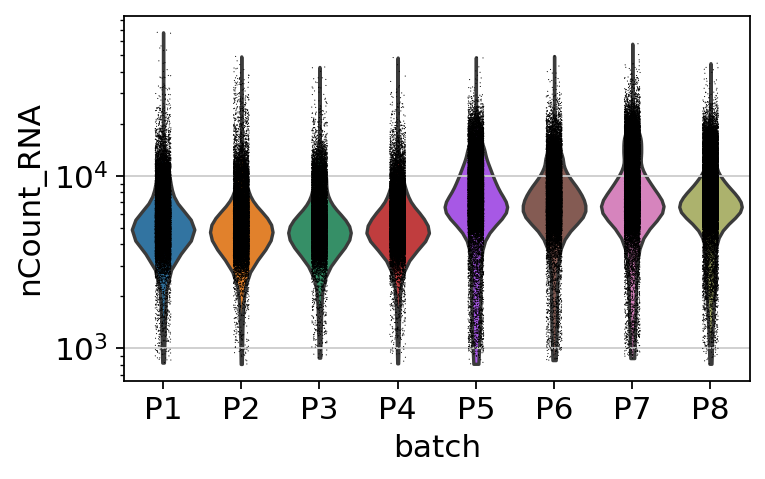

In [9]:
t1 = sc.pl.violin(data, 'nCount_RNA', groupby='batch', size=0.5, log=True)

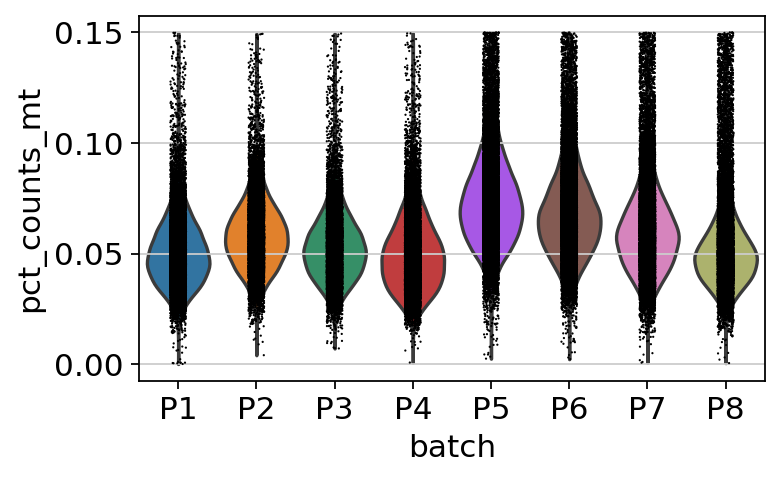

In [10]:
t2 = sc.pl.violin(data, 'pct_counts_mt', groupby='batch')

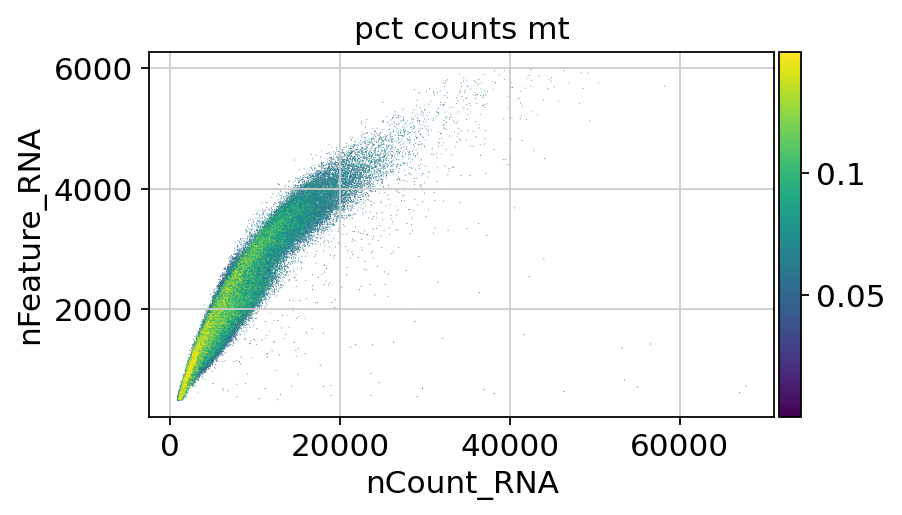

In [11]:
p1 = sc.pl.scatter(data, 'nCount_RNA', 'nFeature_RNA', color='pct_counts_mt')

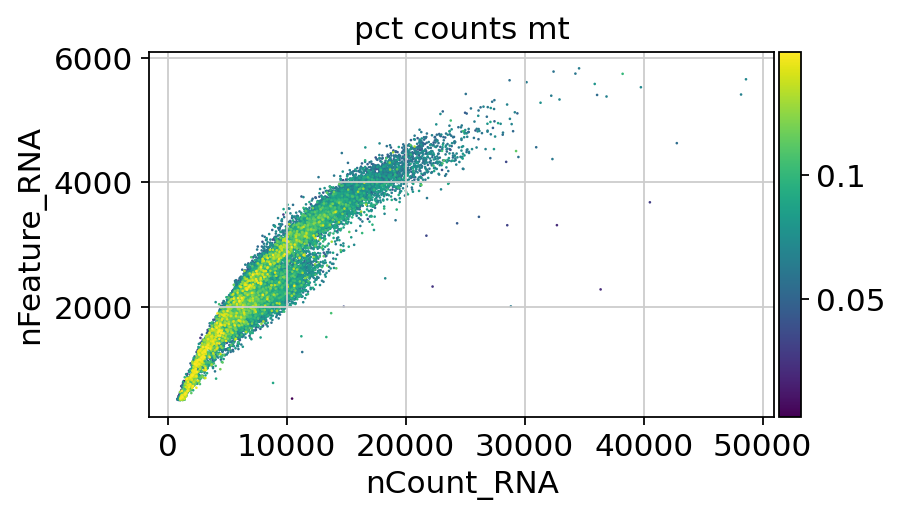

In [12]:
# Let's look at the worst batch
p1 = sc.pl.scatter(data[data.obs['batch'] == 'P5'], 'nCount_RNA', 'nFeature_RNA', color='pct_counts_mt')

/home/simon/miniconda3/envs/nips/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


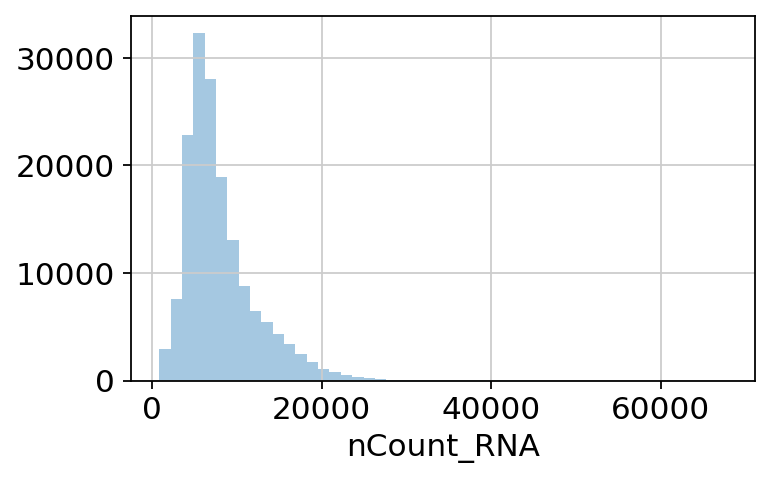

In [13]:
p3 = sns.distplot(data.obs['nCount_RNA'], kde=False)

In [14]:
sc.pp.filter_cells(data, max_counts=20000)

filtered out 3095 cells that have more than 20000 counts


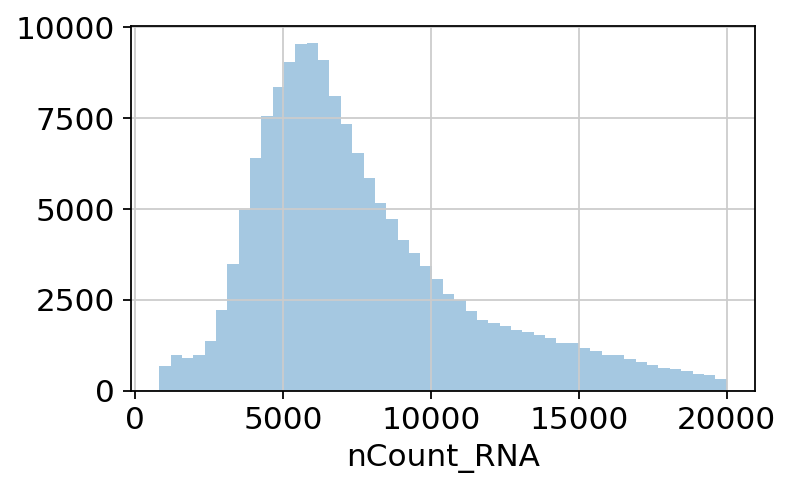

In [15]:
p3 = sns.distplot(data.obs['nCount_RNA'], kde=False)

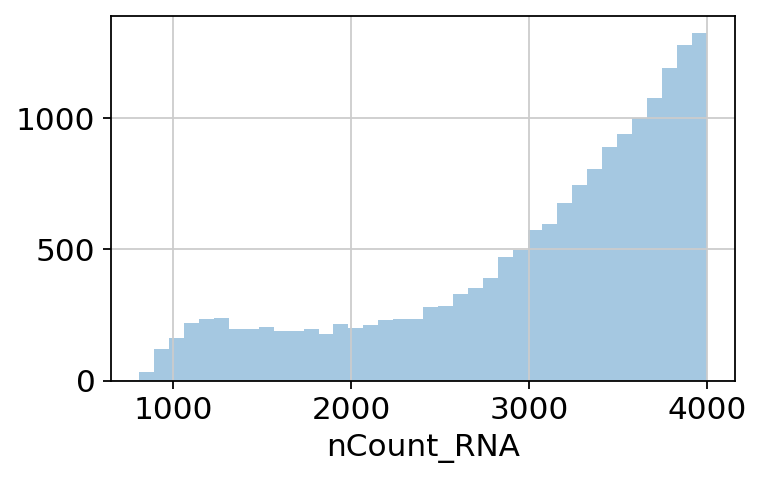

In [16]:
p4 = sns.distplot(data.obs['nCount_RNA'][data.obs['nCount_RNA'] < 4000], kde=False)

In [17]:
sc.pp.filter_cells(data, min_counts=2000)

filtered out 2597 cells that have less than 2000 counts


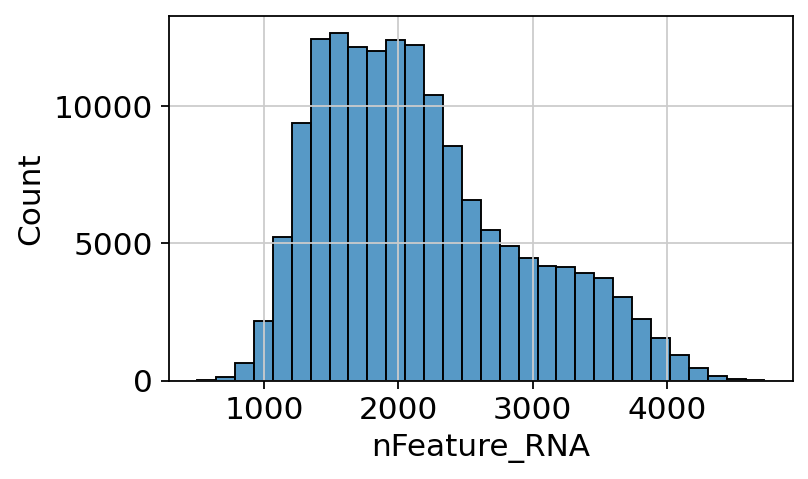

In [18]:
# Let's see how many cells express some genes
plot = sns.histplot(data.obs['nFeature_RNA'], bins=30)

In [19]:
data = gex_qc.calculate_n_cells(data)

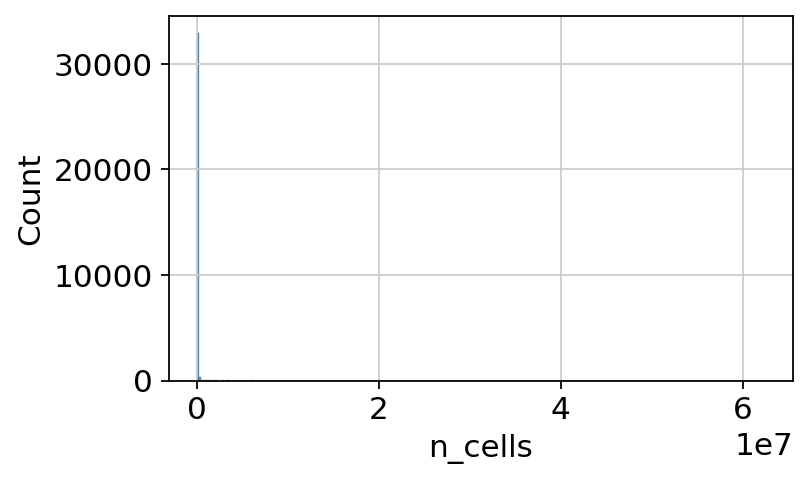

In [20]:
# Let's see how many cells express some genes
plot = sns.histplot(data.var['n_cells'], bins=300)

In [21]:
# There are many genes with no expression at all
(data.var['n_cells'] == 0.0).sum()

6185

In [22]:
sc.pp.filter_genes(data, min_cells=1)

filtered out 6185 genes that are detected in less than 1 cells


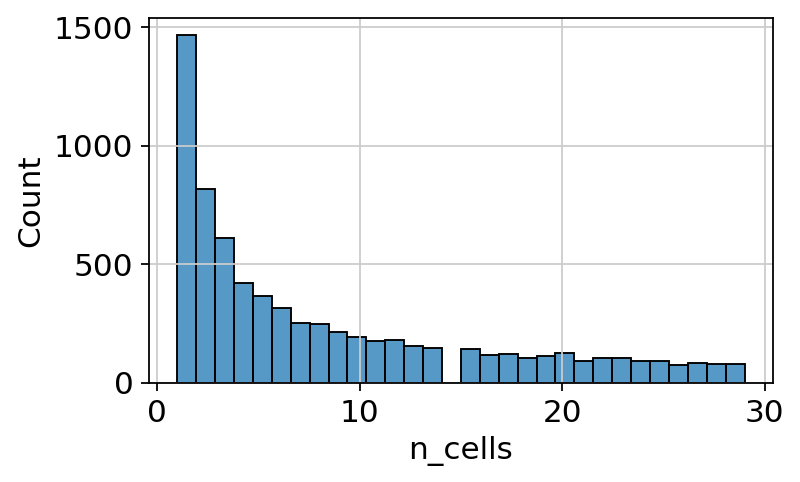

In [23]:
# Let's look again
plot = sns.histplot(data.var['n_cells'][data.var['n_cells'] < 30], bins=30)

In [24]:
# There are still many genes expressed in less than 20 cells
# Since we have 150k cells, let's discard them
sc.pp.filter_genes(data, min_cells=20)

filtered out 6149 genes that are detected in less than 20 cells


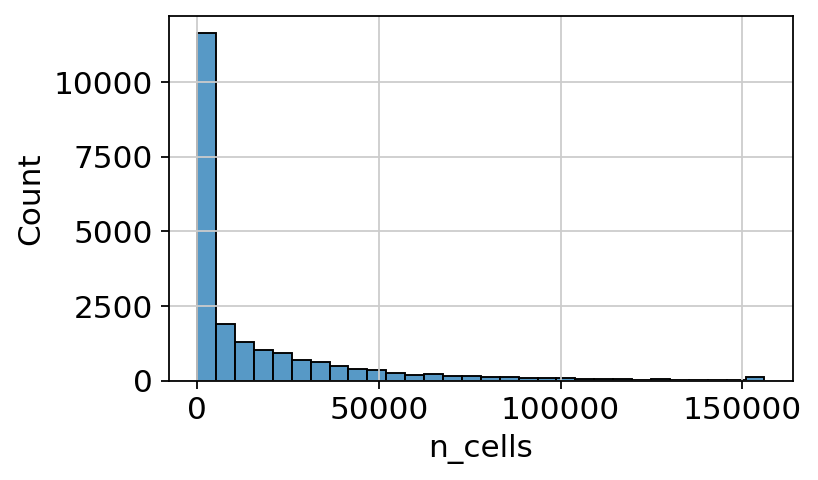

In [25]:
# Let's look again
plot = sns.histplot(data.var['n_cells'], bins=30)

normalizing counts per cell
    finished (0:00:01)


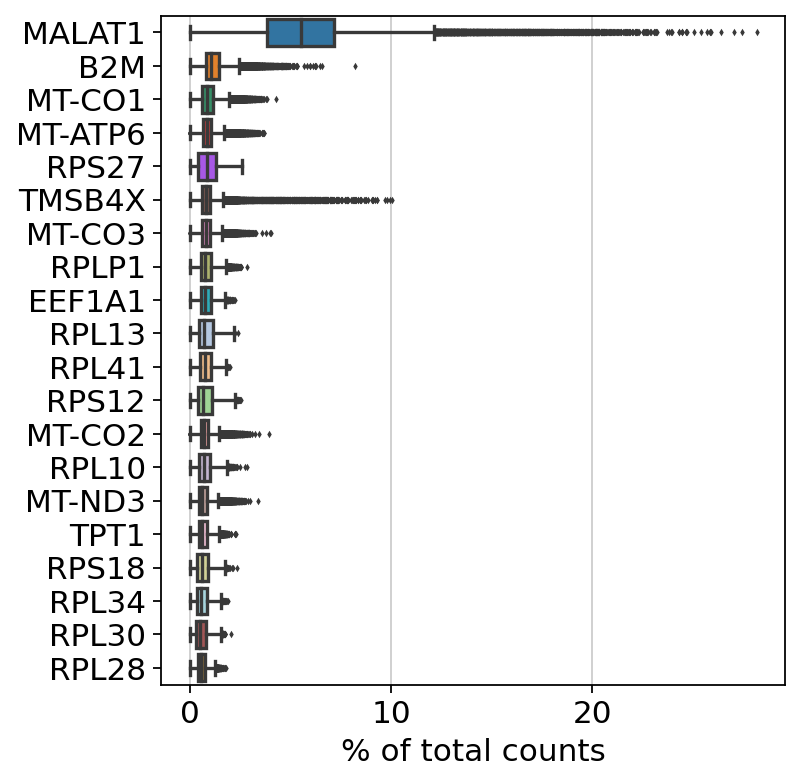

In [26]:
# Here is the highest expressed genes
sc.pl.highest_expr_genes(data, n_top=20, )

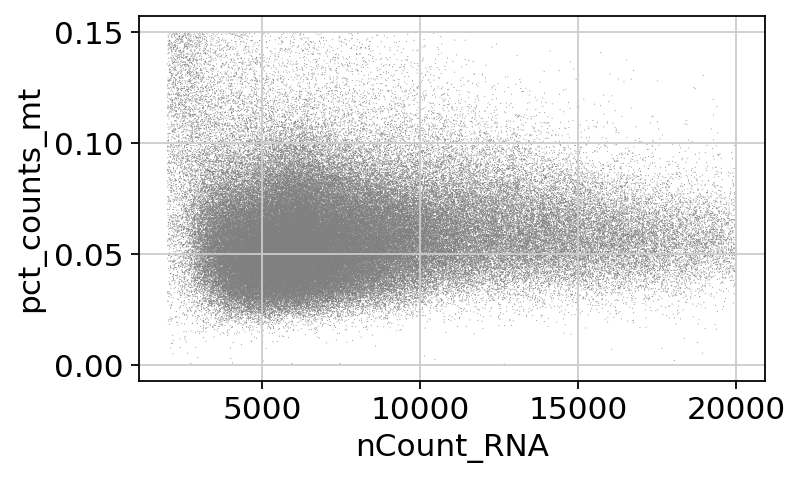

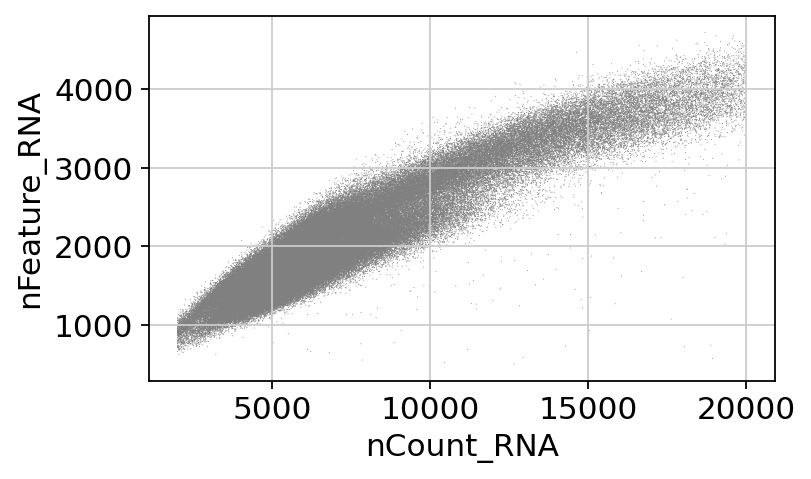

In [27]:
sc.pl.scatter(data, x='nCount_RNA', y='pct_counts_mt')
sc.pl.scatter(data, x='nCount_RNA', y='nFeature_RNA')

computing PCA
    with n_comps=50
    finished (0:01:39)


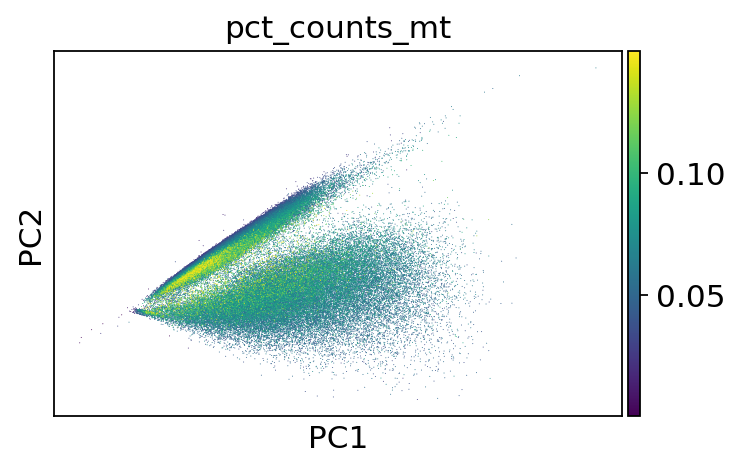

In [28]:
sc.tl.pca(data)
sc.pl.pca(data, color='pct_counts_mt')

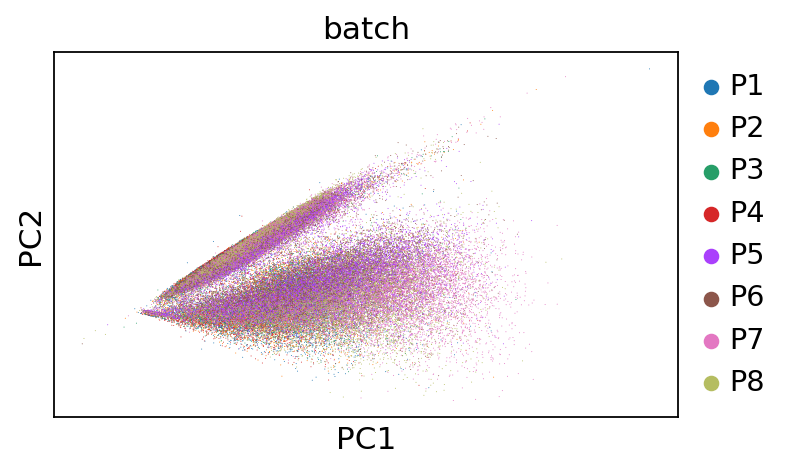

In [29]:
sc.pl.pca(data, color='batch')

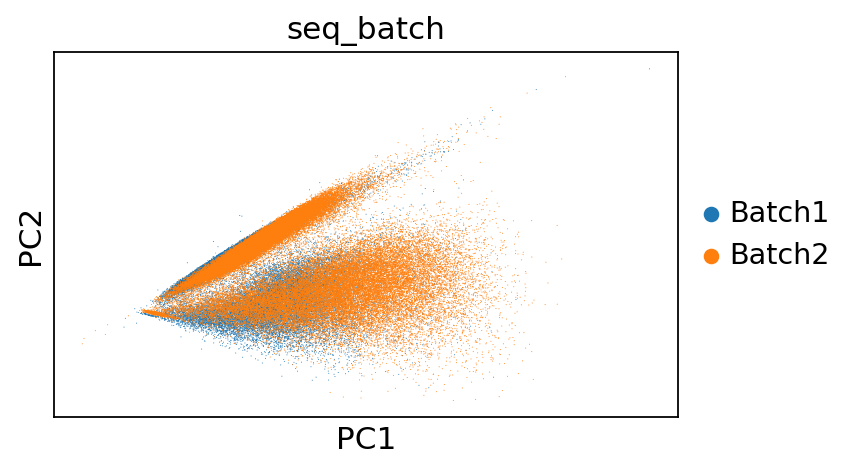

In [31]:
sc.pl.pca(data, color='seq_batch')

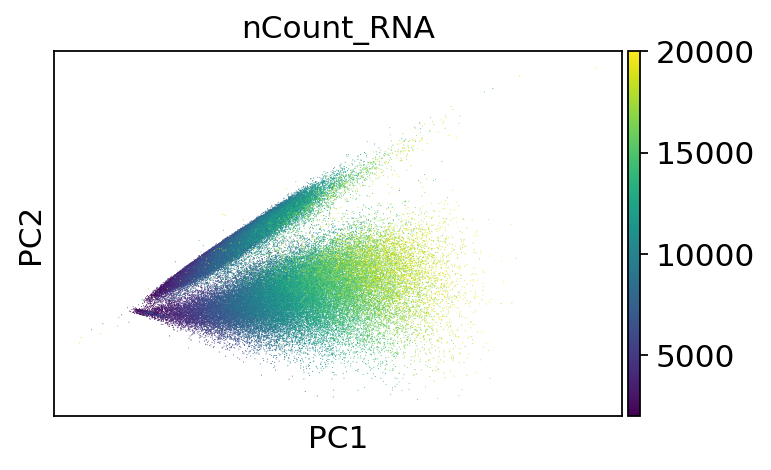

In [32]:
sc.pl.pca(data, color='nCount_RNA')

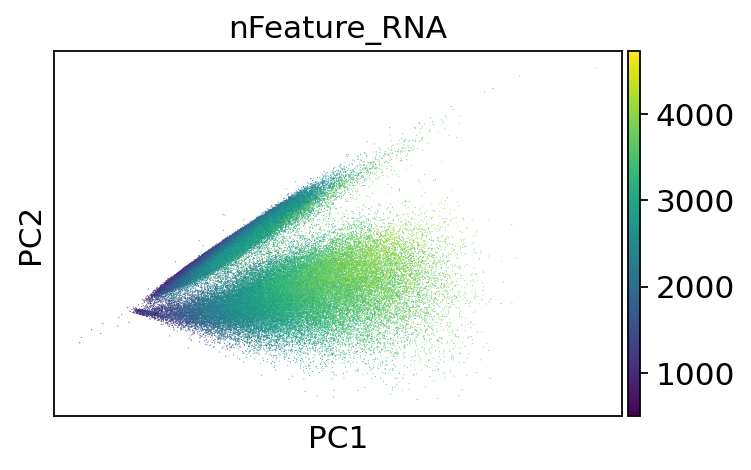

In [33]:
sc.pl.pca(data, color='nFeature_RNA')

In [32]:
data.obs['batch'].value_counts()

P8    25446
P7    24087
P5    20721
P6    20044
P1    17725
P4    16829
P2    16816
P3    14404
Name: batch, dtype: int64

We can't say if there is batch effect, because PCA sorts cells by number of counts.

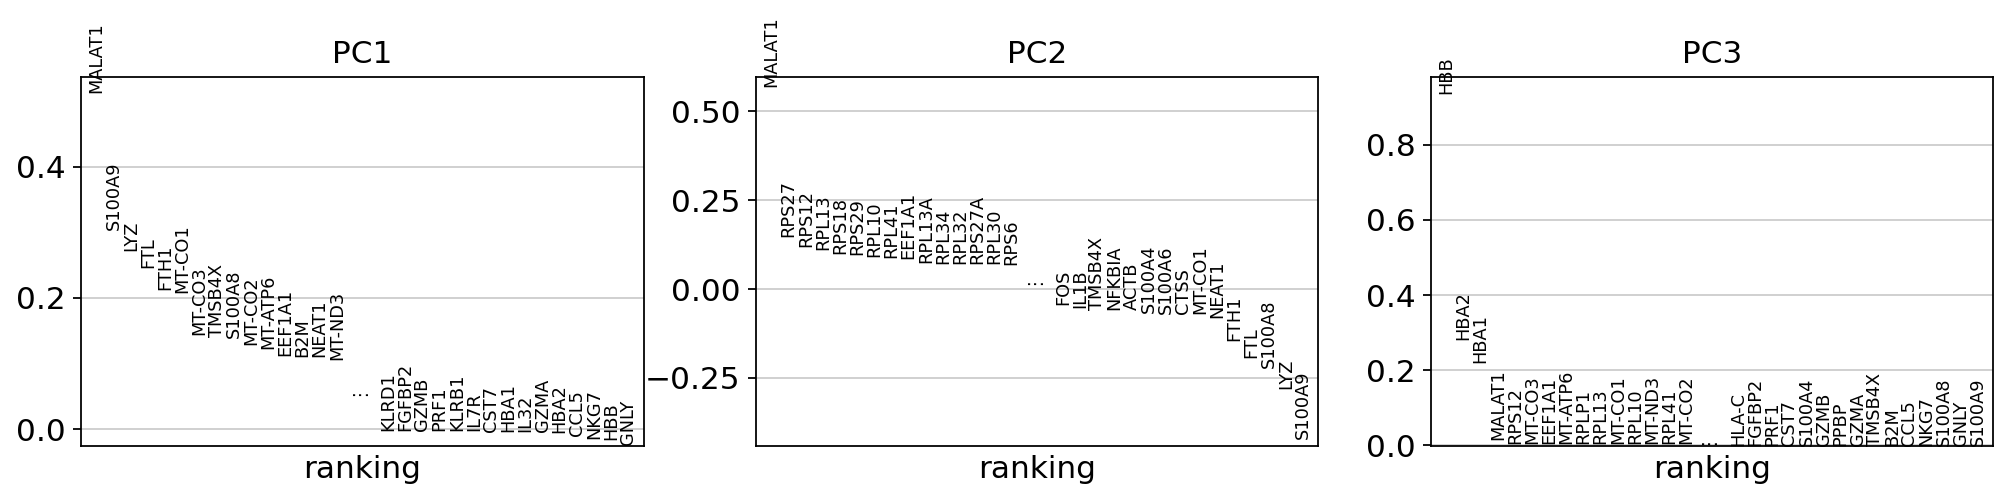

In [34]:
sc.pl.pca_loadings(data, components = '1,2,3')

## Normalization

I couldn't do scran normalization because of memory limit. Let's do CPM normalization instead.

In [35]:
sc.pp.normalize_total(data, target_sum=1e6, )

normalizing counts per cell
    finished (0:00:01)


In [36]:
data.X.sum(axis=1)

matrix([[1000000.  ],
        [1000000.06],
        [1000000.  ],
        ...,
        [ 999999.94],
        [1000000.  ],
        [ 999999.9 ]], dtype=float32)

computing PCA
    with n_comps=50
    finished (0:01:39)


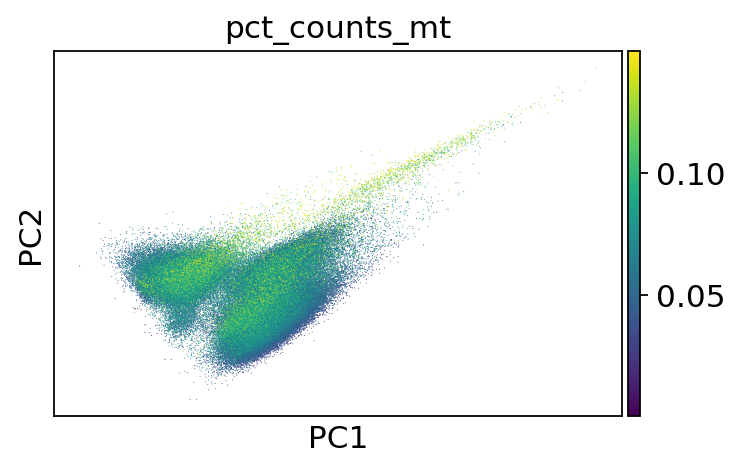

In [37]:
# let's look at PCA again
sc.tl.pca(data)
sc.pl.pca(data, color='pct_counts_mt')

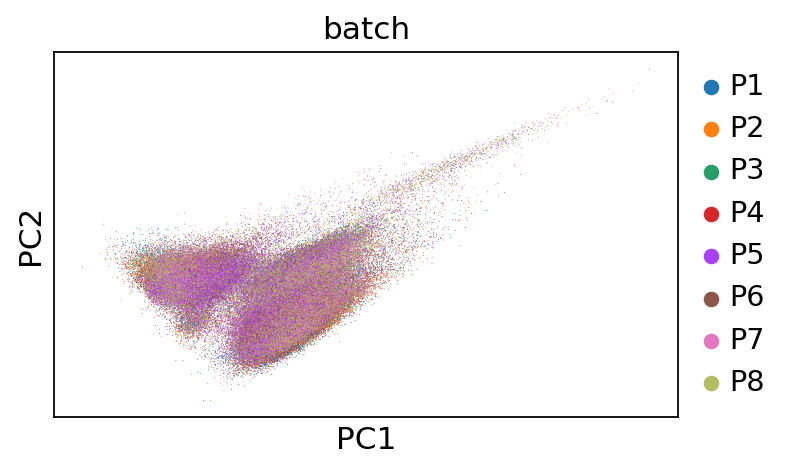

In [38]:
sc.pl.pca(data, color='batch')

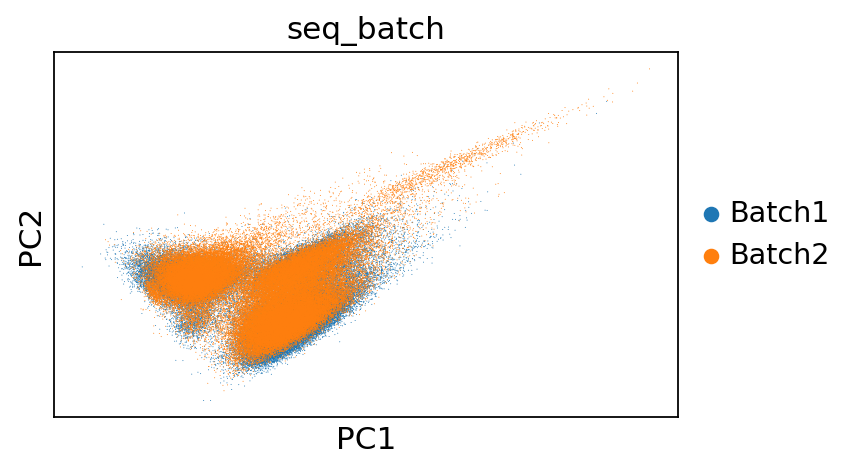

In [41]:
sc.pl.pca(data, color='seq_batch')

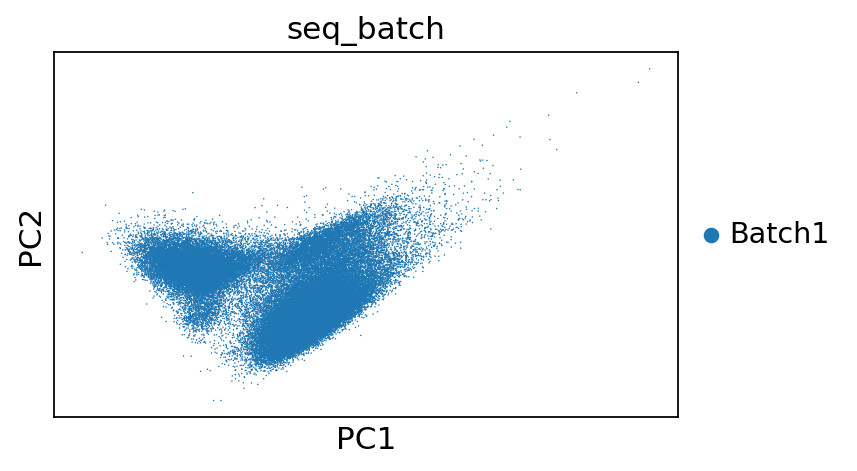

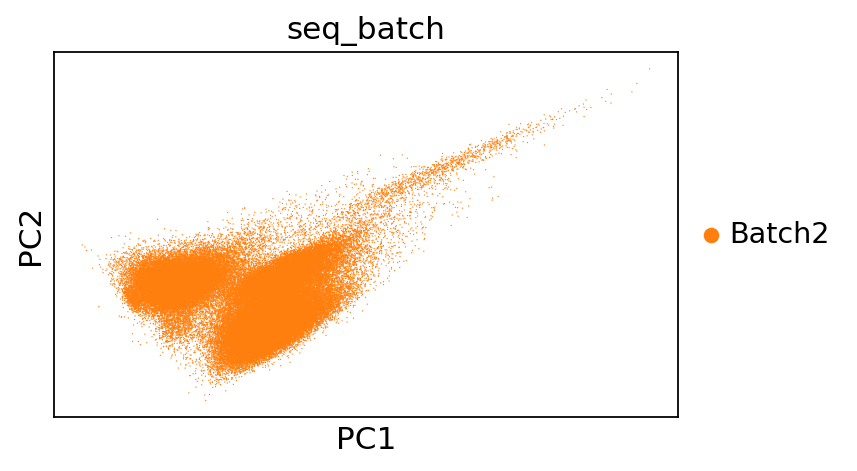

In [43]:
sc.pl.pca(data[data.obs['seq_batch'] == 'Batch1'], color='seq_batch')
sc.pl.pca(data[data.obs['seq_batch'] == 'Batch2'], color='seq_batch')

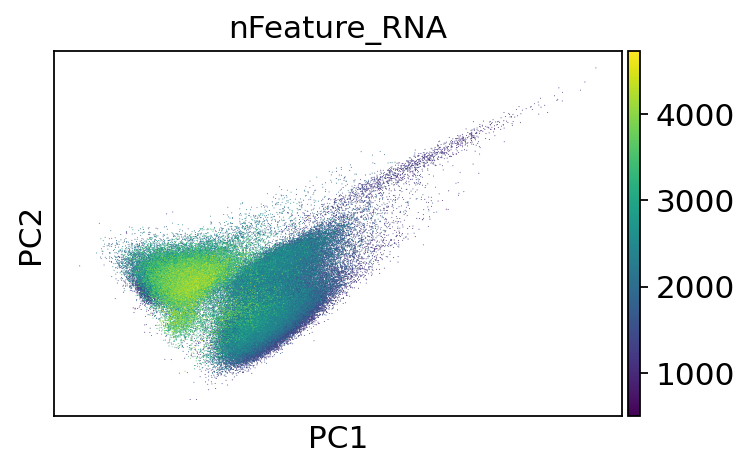

In [41]:
sc.pl.pca(data, color='nFeature_RNA')